# Zodiac Sign Predictor

Online dating is now a common trend in many countries across Europe and North America. This dating method is preferred over the traditional form because of many reasons including:

- Secured communication
- Option to scope a plethora of possible dating partners before actually dating
- Meet people from different backgrounds
- etc.

In addition to some of the benefits outlined above, online dating is even made easier through the use of mobile apps for a minimum subscription and free in some platforms. Popular dating platforms like Tinder and Bumble require a monthly fee while OkCupid offers free use of its app.

Using these apps comes with a bit of drawback as they require users to provide some personal details such as gender, sexual orientation, level of education, and sometimes brief essays. As this process can seem daunting, users sometimes fail to disclose some of these information. The apps algorithm perform better at suggesting dating partner when more data is provided by the user.

In the light of the above, this project will employ Machine Learning to predict zodiac signs of users in online dating sites. The data used is from OkCupid, one of the free dating platforms. The names and identities of the users are not provided in the data set.

In order to effectively perform our analysis and run Machine Learning models, the following steps will be implemented:
- Exploratory Data Analysis
- Data Preprocessing
- Machine Learning
- Conclusion

## Exploratory Data Analysis

The below will be performed in this step:
- Load data
- Inspect all columns for data quality issues
- Apply statistical analysis

### Load Data

Import all dependencies for EDA

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [36]:
profiles = pd.read_csv('profiles.csv')
print(f"There {len(profiles)} rows in the data")
print(profiles.columns)

There 59946 rows in the data
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [37]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays too. ;)<br />\nmy over the top energy and my outlook on life... just give me a bag\nof lemons and see what happens. ;),NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,

### Clean the data

Next step in our analysis is to clean the data and transform it to suitable format for exploratory data analysis and ultimately to run machine learning models

#### Check for null values

In [38]:
profiles.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
dtype: bool

There are null values in all but seven columns in the data. First, we inspect our target variable **signs**

In [39]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

There are 48890 non null values in **sign**. This signifies we can account for about **82%** of our data. Therefore, all fields will be reduced to the length of **sign** column.

**Drop all null values in **sign****

In [40]:
profiles_df = profiles.dropna(subset=["sign"]).copy()
print(f"There are {len(profiles_df)} in the dataframe")

There are 48890 in the dataframe


**Inspect the labels in sign**

In [41]:
profiles_df['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter                1408
capricorn and it&rsquo;s fun

Upon inspection, it is evident that labels need to be separated from the rest of the text. Regex expressions would have been a preferred method to extract the labels but in this case, the labels are the first words in the rows(sentences) making it easier to employ list comprehension to slice the first element after the sentence is split using lambda function.
A new column is created containing extracted labels.

Split each sentence into a list of words

In [42]:
split_signs = profiles_df.apply(lambda label: label['sign'].split(), axis=1)

Extract first element in each list and create new column

In [43]:
profiles_df['labels'] = [x[0] for x in split_signs]

Inspect values and distribution of labels

In [44]:
profiles_df['labels'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: labels, dtype: int64

In [46]:
profiles_df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,labels
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays too. ;)<br />\nmy over the top energy and my outlook on life... just give me a bag\nof lemons and see what happens. ;),NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too ser

We now have the target variables for the analysis. 

Plot of label distribution will indicate if the classes (labels) are unbalanced.

In [47]:
import seaborn as sns
sns.set_style("darkgrid")

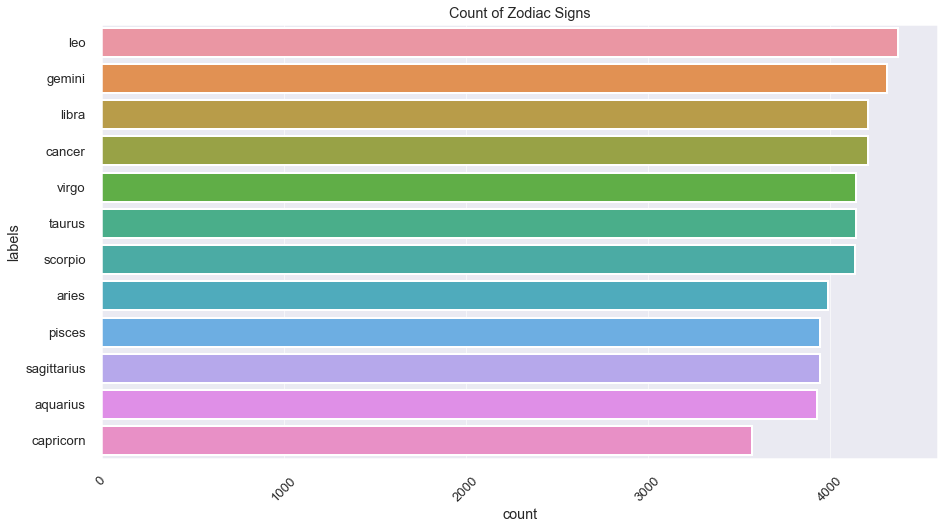

In [107]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['labels'], order=profiles_df['labels'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Zodiac Signs')
plt.savefig('zod_labels.png')
plt.show()

The plot indicates that the classes are balanced.

Having cleaned and formatted the target variable, we now focus on cleaning and formatting the features (independent variables). The columns to be used as features include: body type, diet, drinks, drugs, education, the essay columns, job, offspring, pets and religion.

Combine all essays into one column essay

**essay**

First, fill all null valuesd with an empty string. The columns are then combined into **essay**.

In [70]:
profiles_df.fillna({'essay0':'',
           'essay1':'',
           'essay2':'',
          'essay3':'',
          'essay4':'',
          'essay5':'',
          'essay6':'',
          'essay7':'',
        'essay8':'',
        'essay9':''},
          inplace=True)

In [71]:
profiles_df['essay'] = profiles_df['essay0'] + profiles_df['essay1'] + profiles_df['essay2'] + profiles_df['essay3'] + profiles_df['essay4']+\
profiles_df['essay5'] + profiles_df['essay6'] + profiles_df['essay7'] + profiles_df['essay8'] + profiles_df['essay9'] 

In [72]:
profiles_df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,labels,essay
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,gemini,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel..."
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big a

Next column to inspect is body type. There are fewer missing values in this column.

**body_type**

Fill missing values with other.

In [75]:
profiles_df.fillna({'body_type':'other'},
          inplace=True)

Check the count and create plot of the various body type.

In [76]:
profiles_df['body_type'].value_counts()

average           12362
fit               10137
athletic           9197
other              3938
thin               3754
curvy              3603
a little extra     2362
skinny             1430
full figured        940
overweight          382
jacked              347
used up             288
rather not say      150
Name: body_type, dtype: int64

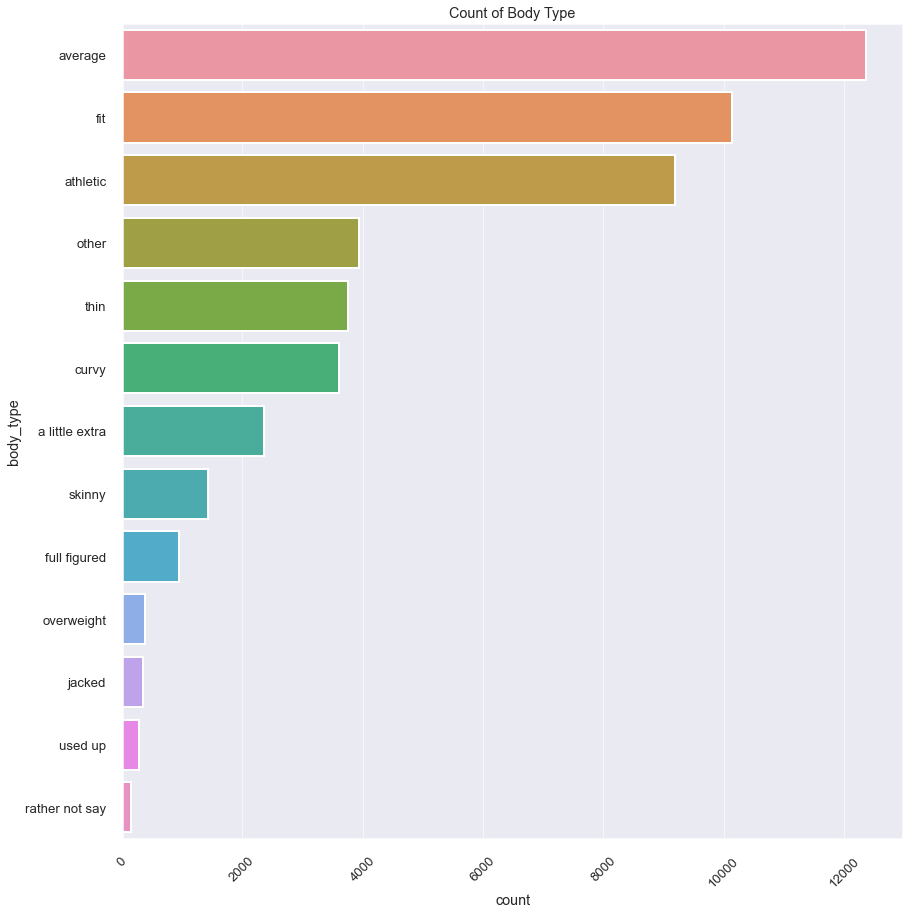

In [103]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(14, 15)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['body_type'], order=profiles_df['body_type'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Body Type')
plt.savefig('body_type.png')
plt.show()

**diet**

In [80]:
print(profiles_df['diet'].value_counts())
print(profiles_df['diet'].nunique())

mostly anything        14261
anything                5032
strictly anything       4270
mostly vegetarian       2930
mostly other             909
strictly vegetarian      733
vegetarian               539
strictly other           404
mostly vegan             293
other                    286
strictly vegan           196
vegan                    111
mostly kosher             70
mostly halal              40
strictly kosher           14
strictly halal            14
halal                     10
kosher                     8
Name: diet, dtype: int64
18


There are 18 sub categories of diet. For the purpose of this exercise, the categories will be collapsed into their parent categories namely, anything, vegetarian, vegan, halal, kosher and other. The null values will be filled with **other**.

In [81]:
profiles_df['diet'].fillna('other', inplace = True)

In [82]:
profiles_df['diet'].replace({'mostly anything': 'anything',
                             'strictly anything': 'anything',
                             'mostly vegetarian': 'vegetarian',
                             'strictly vegetarian': 'vegetarian',
                             'mostly other': 'other',
                             'strictly other': 'other',
                             'mostly vegan': 'vegan',
                             'strictly vegan': 'vegan',
                             'mostly halal': 'halal',
                             'strictly halal': 'halal',
                             'mostly kosher': 'kosher',
                             'strictly kosher': 'kosher'   
                                }, inplace = True)

In [83]:
print(profiles_df['diet'].value_counts())
print(profiles_df['diet'].nunique())

anything      23563
other         20369
vegetarian     4202
vegan           600
kosher           92
halal            64
Name: diet, dtype: int64
6


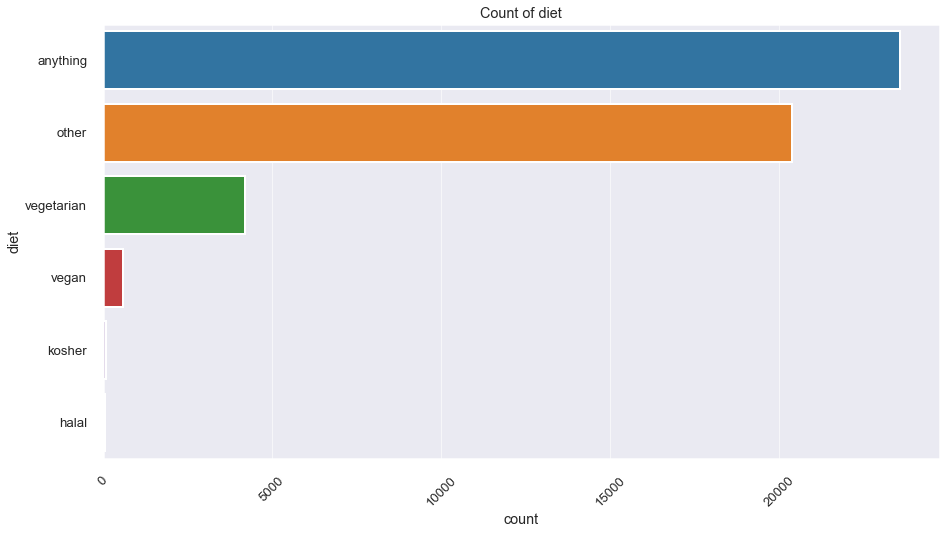

In [104]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['diet'], order=profiles_df['diet'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of diet')
plt.savefig('diet.png')
plt.show()

In [90]:
# profiles_df.info()

**drinks**

In [91]:
print(profiles_df['drinks'].value_counts())
print(f"There are {profiles_df['drinks'].nunique()} distinct drinks categories:")
print(f".........................................................................")
print(profiles_df['drinks'].unique())

socially       34647
rarely          5034
often           4289
not at all      2770
very often       381
desperately      243
Name: drinks, dtype: int64
There are 6 distinct drinks categories:
.........................................................................
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


Replace nulls with **other**

In [92]:
profiles_df['drinks'].fillna('other', inplace = True)

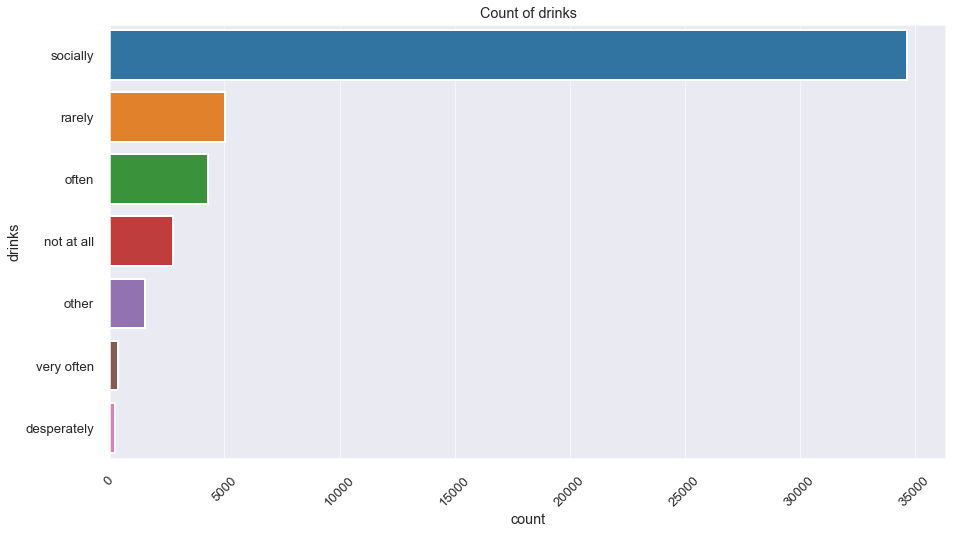

In [105]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['drinks'], order=profiles_df['drinks'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of drinks')
plt.savefig('drinks.png')
plt.show()

From the plot, we can tell that social drinkers make up most of the users on the dating platform.

**drugs**

In [100]:
print(profiles_df['drugs'].value_counts(normalize  =True))
print(f"There are {profiles_df['drugs'].nunique()} distinct drugs categories:")

never        0.622152
other        0.231806
sometimes    0.139026
often        0.007016
Name: drugs, dtype: float64
There are 4 distinct drugs categories:


In [96]:
profiles_df['drugs'].fillna('other', inplace = True)

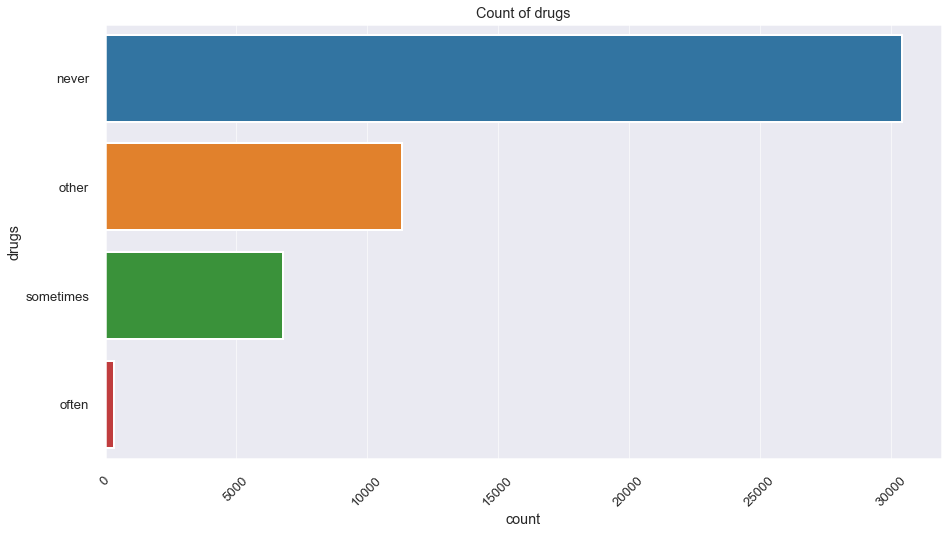

In [99]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['drugs'], order=profiles_df['drugs'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of drugs')
plt.savefig('drugs.png')
plt.show()

Over 60% of users claim they have never used drugs while less than 1% use often.

**education**

In [106]:
print(profiles_df['education'].value_counts(normalize  =True))
print(f"There are {profiles_df['education'].nunique()} distinct education categories:")

graduated from college/university    0.447205
graduated from masters program       0.159985
working on college/university        0.114924
graduated from two-year college      0.032369
working on masters program           0.031943
graduated from high school           0.030264
working on two-year college          0.022586
dropped out of college/university    0.020348
graduated from law school            0.019945
graduated from ph.d program          0.019676
working on ph.d program              0.014953
college/university                   0.014035
graduated from space camp            0.013162
dropped out of space camp            0.010364
working on space camp                0.009111
graduated from med school            0.007477
working on law school                0.004813
two-year college                     0.004522
dropped out of two-year college      0.004052
working on med school                0.003761
dropped out of masters program       0.002552
dropped out of ph.d program       

**education** contains 32 distinct values including graduated, working on, and dropped out. These labels are cut across various levels of education: high school, two year college, college/university, masters, ph.D, med school, law school and space camp. To make the analysis easier, the education column will be split into two, with set of values for education status and the other for education level.
In order to split and extract desired values, the labels should be uniformly labeled to either contain graduated, working on or dropped out. Stand alone labels are transformed by adding 'graduated from' prefix to them.

In [185]:
profiles_df['education'].fillna('other', inplace = True)

In [186]:
profiles_df['education'].replace({'college/university': 'graduated from college/university',
                                  'high school': 'graduated from high school',
                                  'two-year college': 'graduated from two-year college',
                                  'masters program': 'graduated from masters program',
                                  'space camp': 'graduated from space camp',
                                  'ph.d program': 'graduated from ph.d program',
                                  'law school': 'graduated from law school',
                                  'med school': 'graduated from med school'
                                 }, inplace = True)

In [114]:
#print(profiles_df['education'].value_counts(normalize  =True))

Extract values for education status and education level.

In [187]:
edu_vals = profiles_df.apply(lambda label: label['education'].split(), axis=1) 

In [191]:
len(edu_vals)

48890

In [194]:
status_vals = []
for x in edu_vals:
    if 'graduated' in x:
        status_vals.append('graduated')
    elif 'other' in x:
        status_vals.append('other')
    elif 'working' and 'on' in x:
        status_vals.append('working on')
    elif 'dropped' and 'out' in x:
        status_vals.append('dropped out')    

In [195]:
len(status_vals)

48890

In [196]:
level_vals = []
for x in edu_vals:
    if 'college/university' in x:
        level_vals.append('college/university')
    elif 'other' in x:
        level_vals.append('other')
    elif 'high' and 'school' in x:
        level_vals.append('high school')
    elif 'two-year' and 'college' in x:
        level_vals.append('two-year college')
    elif 'masters' and 'program' in x:
        level_vals.append('masters program')
    elif 'ph.d' and 'program' in x:
        level_vals.append('ph.d program')
    elif 'law' and 'school' in x:
        level_vals.append('law school')
    elif 'med' and 'school' in x:
        level_vals.append('med school')
    elif 'space' and 'camp' in x:
        level_vals.append('space camp')

In [197]:
len(level_vals)

48890

In [198]:
profiles_df['edu_status'] = [x for x in status_vals]
profiles_df['edu_level'] = [x for x in level_vals]

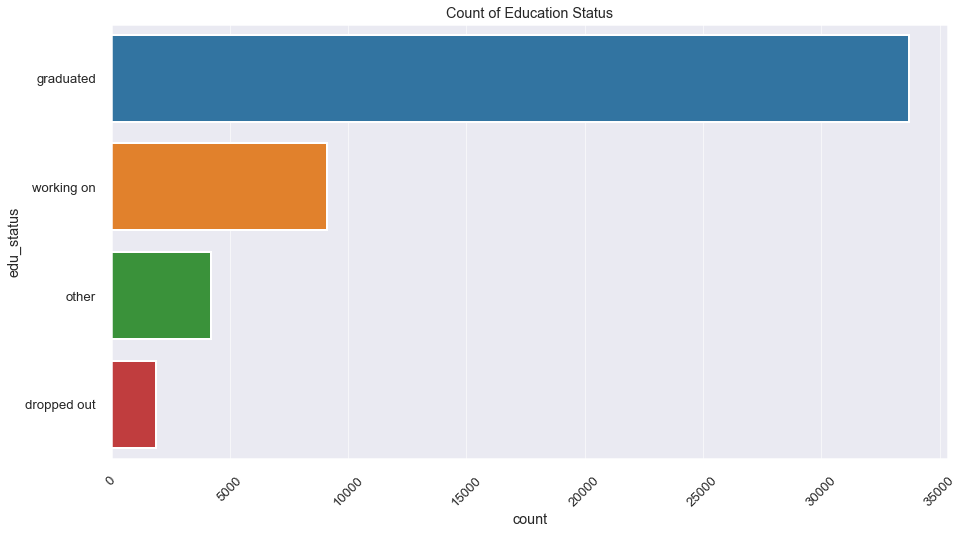

In [199]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['edu_status'], order=profiles_df['edu_status'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Education Status')
plt.savefig('edu_status.png')
plt.show()

In [201]:
profiles_df['edu_status'].value_counts(normalize = True)

graduated      0.689078
working on     0.186378
other          0.086255
dropped out    0.038290
Name: edu_status, dtype: float64

The plot indicates that more than half of users are graduates from atleast one of the levels of education.

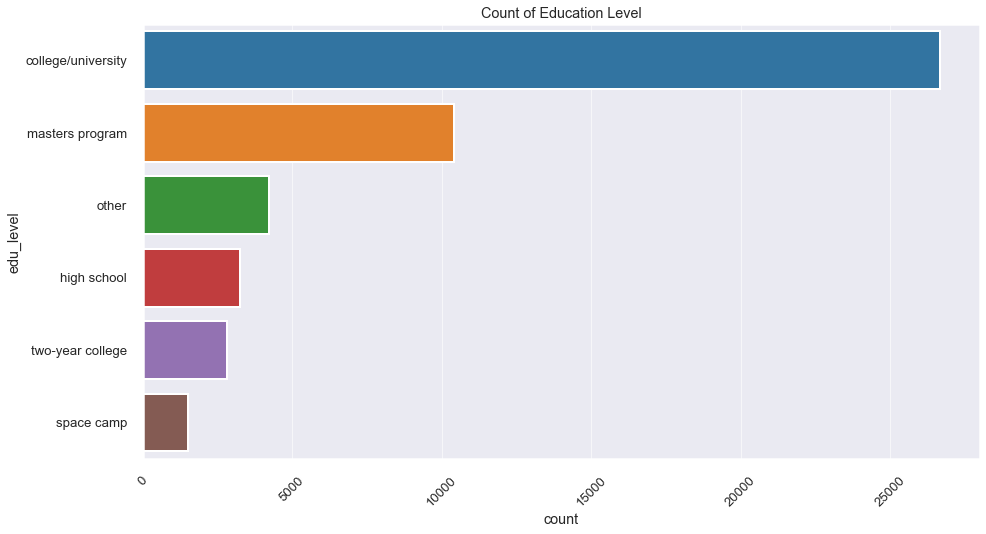

In [200]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['edu_level'], order=profiles_df['edu_level'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Education Level')
plt.savefig('edu_level.png')
plt.show()

In [202]:
profiles_df['edu_level'].value_counts(normalize = True)

college/university    0.545060
masters program       0.213091
other                 0.086255
high school           0.066701
two-year college      0.058049
space camp            0.030845
Name: edu_level, dtype: float64

The plot indicates that more than half of users are either working on or obtained a college/university degree or dropped out at this level.

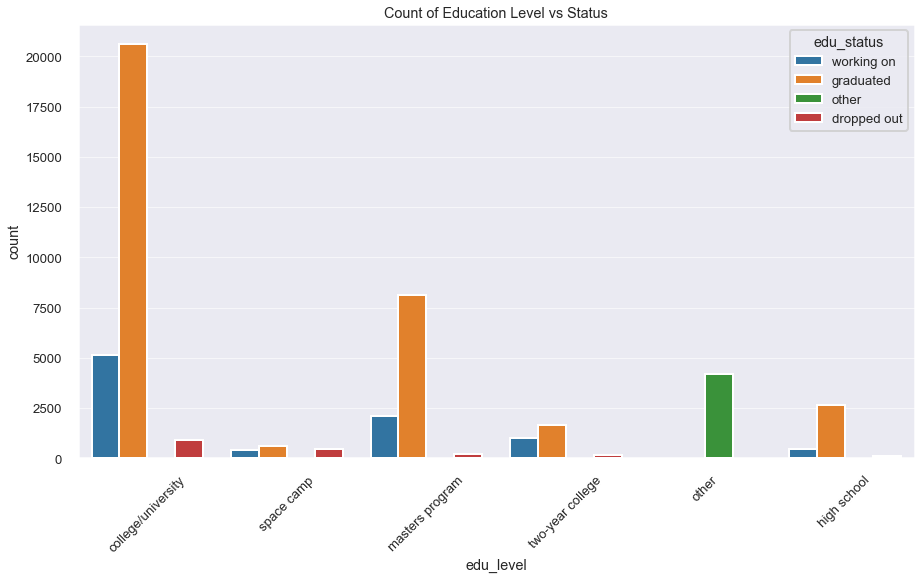

In [204]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(x='edu_level', hue='edu_status', data=profiles_df, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Education Level vs Status')
plt.savefig('edu_level_v_status.png')
plt.show()

# sns.countplot(x='edu_level', hue='edu_status', data=profiles_df)
# plt.show()

**ethnicity**

In [207]:
profiles_df['ethnicity'].unique()
print(f"There are {profiles_df['ethnicity'].nunique()} categories of ethnicity.")

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, pacific islander',
       'black, native american, white', 'middle eastern, other',
       'native american, white', 'indian', 'black',
       'black, native american, hispanic / latin',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'hispanic / latin, other', 'other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, other',
       'black, native american, hispanic / latin, white, other',
       'pacific islander, hispanic / latin',
       'bla

The ethnicities can be categorized based on the distict labels in the ethinicity column:
- white
- black
- asian
- native american
- hispanic/latin
- pacific islander
- indian
- middle eastern
- other 
- mixed (if identifies with more than one ethnicity)

In [208]:
# fill null values with other
profiles_df['ethnicity'].fillna('other', inplace = True)

In [209]:
ethnic_vals = profiles_df.apply(lambda label: label['ethnicity'].split(','), axis=1) 
print(len(ethnic_vals))

48890


In [213]:
#create empty list to hold extracted ethnicities
ethnic_vals_unique = []
for x in ethnic_vals:
    if len(x) == 1 and 'white' in x:
        ethnic_vals_unique.append('white')
    elif len(x) == 1 and 'black' in x:
        ethnic_vals_unique.append('black')
    elif len(x) == 1 and 'asian' in x:
        ethnic_vals_unique.append('asian')
    elif len(x) == 1 and 'native american' in x:
        ethnic_vals_unique.append('native american')
    elif len(x) == 1 and 'hispanic/latin' in x:
        ethnic_vals_unique.append('hispanic/latin')
    elif len(x) == 1 and 'pacific islander' in x:
        ethnic_vals_unique.append('pacific islander')
    elif len(x) == 1 and 'indian' in x:
        ethnic_vals_unique.append('indian')
    elif len(x) == 1 and 'middle eastern' in x:
        ethnic_vals_unique.append('middle eastern')
    elif len(x) == 1 and 'other' in x:
        ethnic_vals_unique.append('other')
    elif len(x) >= 1:
        ethnic_vals_unique.append('mixed')

In [216]:
# len(ethnic_vals_unique)
# ethnic_vals_unique

create a new column to hold disticnt ethnic categories.

In [217]:
profiles_df['ethnic_id'] = [x for x in ethnic_vals_unique]

In [225]:
profiles_df['ethnic_id'].value_counts(normalize = True)

white               0.550174
mixed               0.174187
other               0.109695
asian               0.097648
black               0.036858
indian              0.017079
pacific islander    0.007670
middle eastern      0.005645
native american     0.001043
Name: ethnic_id, dtype: float64

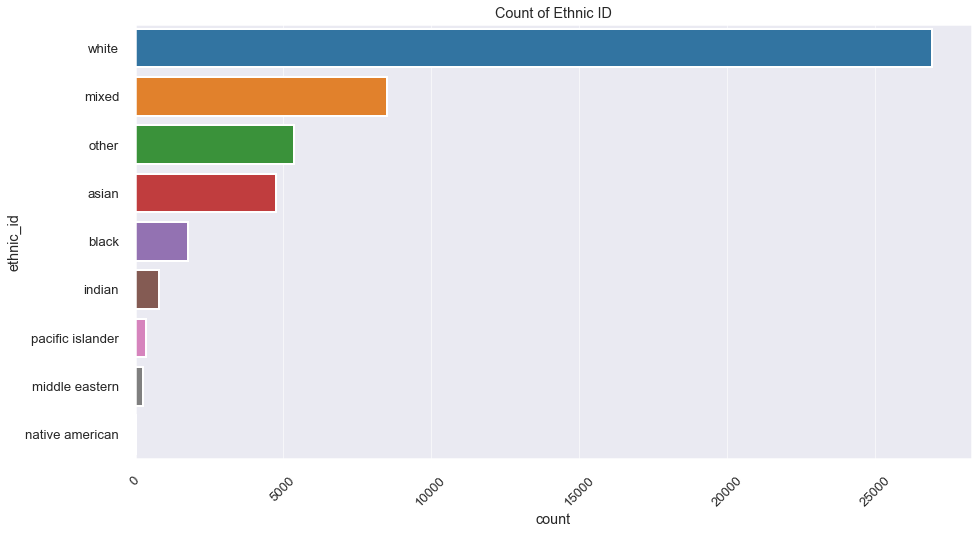

In [224]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(y = profiles_df['ethnic_id'], order=profiles_df['ethnic_id'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Ethnic ID')
plt.savefig('ethnic_id.png')
plt.show()

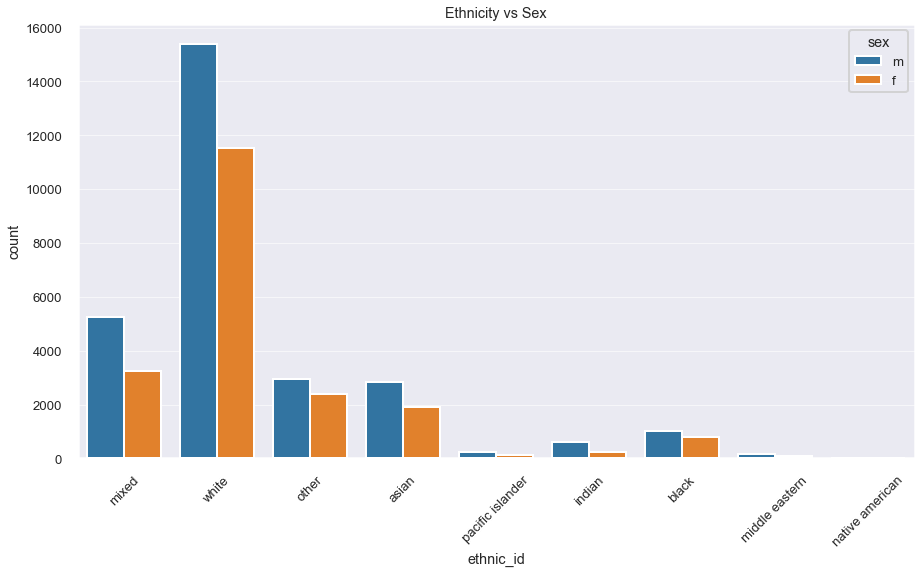

In [226]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(x = 'ethnic_id', hue = 'sex', data = profiles_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Ethnicity vs Sex')
plt.savefig('ethnic_sex.png')
plt.show()

# sns.countplot(x='edu_level', hue='edu_status', data=profiles_df)
# plt.show()

More than 50% of users identify as white with males being the largest sex in all ethnic groups. The least ethnic group are pacific islander, native american and middle eastern. They make up about 1% of users.

In [218]:
profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48890 entries, 0 to 59945
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          48890 non-null  int64  
 1   body_type    48890 non-null  object 
 2   diet         48890 non-null  object 
 3   drinks       48890 non-null  object 
 4   drugs        48890 non-null  object 
 5   education    48890 non-null  object 
 6   essay0       48890 non-null  object 
 7   essay1       48890 non-null  object 
 8   essay2       48890 non-null  object 
 9   essay3       48890 non-null  object 
 10  essay4       48890 non-null  object 
 11  essay5       48890 non-null  object 
 12  essay6       48890 non-null  object 
 13  essay7       48890 non-null  object 
 14  essay8       48890 non-null  object 
 15  essay9       48890 non-null  object 
 16  ethnicity    48890 non-null  object 
 17  height       48889 non-null  float64
 18  income       48890 non-null  int64  
 19  job 

**height**

In [219]:
profiles_df['height'].unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 60.,
       63., 76., 61., 74., 78., 79., 80., 83., 59., 77., 58., 56., 95.,
       57., 87., 81., 43., 52., 55., 53., 93.,  8., 82., 36.,  3., 86.,
       84., 94., 50., 47., 49., 48., 54., 90., 88., 37.,  9., 51., 91.,
        1., 92., 26., 85., nan, 89.,  4.])

Fill the one null value with the mean of the height.

In [221]:
import numpy as np
profiles_df['height'].fillna(value = profiles_df['height'].mean(), inplace = True)

In [223]:
# profiles_df['height'].unique()

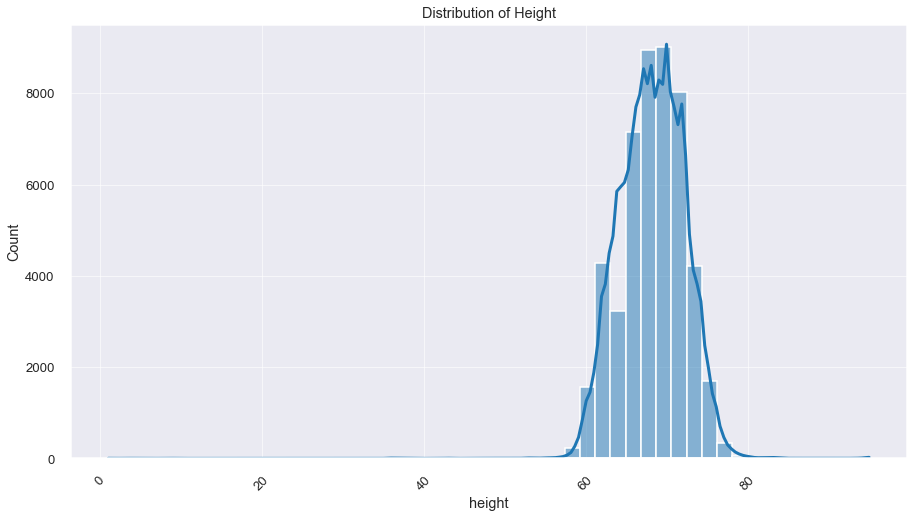

In [232]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.histplot(profiles_df['height'], bins=50, kde=True, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Distribution of Height')
plt.savefig('height.png')
plt.show()

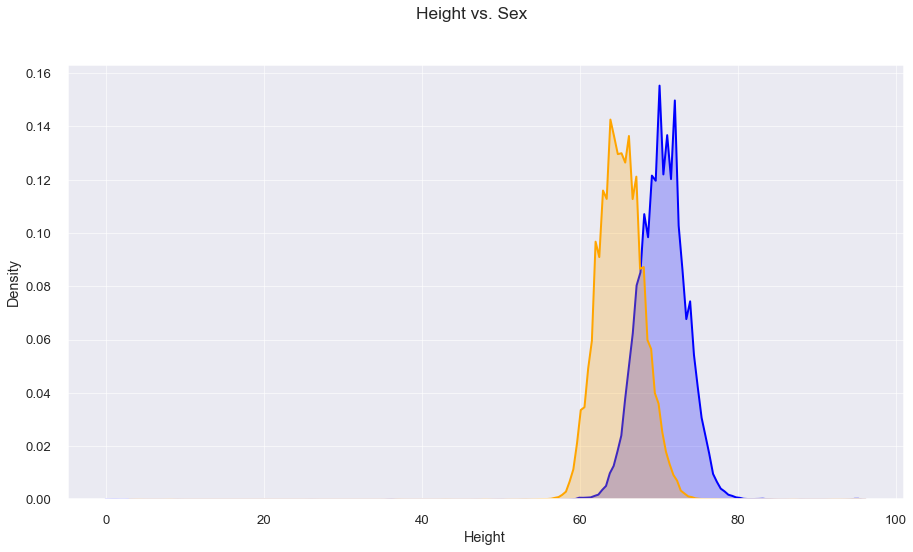

In [235]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.kdeplot(profiles_df[profiles_df['sex']=='m']["height"], shade=True, color="blue", label="male", ax=ax)
sns.kdeplot(profiles_df[profiles_df['sex']=='f']["height"], shade=True, color="orange", label="female", ax=ax)

ax.set_xlabel("Height")
ax.set_ylabel("Density")

fig.suptitle("Height vs. Sex");